# Move Dialogue: Base Task

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd
import nltk
from nltk import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import math
nltk.download('punkt')
nltk.download('universal_tagset')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/nicoespinosadice/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package universal_tagset to
[nltk_data]     /Users/nicoespinosadice/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/nicoespinosadice/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/nicoespinosadice/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Importing Dataset

Source for how to import data:  
https://www.kaggle.com/shashankasubrahmanya/preprocessing-cornell-movie-dialogue-corpus

In [2]:
movie_lines_features = ["LineID", "Character", "Movie", "Name", "Line"]


In [3]:
movie_lines = pd.read_csv("data/movie_lines.txt", sep = "\+\+\+\$\+\+\+", engine = "python", encoding='ISO-8859-1', index_col = False, names = movie_lines_features)


## Data Cleaning

In [4]:
movie_lines = movie_lines.sample(frac=0.1)

In [5]:
movie_lines.head()

,LineID,Character,Movie,Name,Line
275468,L574689,u8130,m552,ED,What'd you call that -- the Protector?
277835,L582469,u8208,m557,NOVAK,You're kidding me.
43468,L275249,u1307,m87,KIRSTY,"It isn't. I know what's going on here, and it..."
29313,L207338,u916,m59,THE RAT,Yeah? About fifty people I didn't know wrote ...
209121,L331862,u6169,m411,MALCOLM,It simply deals with unpredictability in comp...


In [6]:
# Strip the space from "LineID" for further usage and change the datatype of "Line"
movie_lines["LineID"] = movie_lines["LineID"].apply(str.strip)
movie_lines["Line"] = movie_lines["Line"].apply(str)
movie_lines["Line"] = movie_lines["Line"].apply(str.lower)

In [7]:
movie_lines.head()

,LineID,Character,Movie,Name,Line
275468,L574689,u8130,m552,ED,what'd you call that -- the protector?
277835,L582469,u8208,m557,NOVAK,you're kidding me.
43468,L275249,u1307,m87,KIRSTY,"it isn't. i know what's going on here, and it..."
29313,L207338,u916,m59,THE RAT,yeah? about fifty people i didn't know wrote ...
209121,L331862,u6169,m411,MALCOLM,it simply deals with unpredictability in comp...


In [8]:
# # Remove lines that do not contain he or she pronouns
# # Only include lines where ' he ' is in middle of sentence, surrounded by at least 1 space on either side
# movie_lines = movie_lines[movie_lines["Line"].str.contains('|'.join([' he ', ' she ']))]

In [9]:
movie_lines.head()

,LineID,Character,Movie,Name,Line
275468,L574689,u8130,m552,ED,what'd you call that -- the protector?
277835,L582469,u8208,m557,NOVAK,you're kidding me.
43468,L275249,u1307,m87,KIRSTY,"it isn't. i know what's going on here, and it..."
29313,L207338,u916,m59,THE RAT,yeah? about fifty people i didn't know wrote ...
209121,L331862,u6169,m411,MALCOLM,it simply deals with unpredictability in comp...


### Tokenization and Segmentation

In [10]:
# Tokenize and segment
# Drop rows without pronouns

In [11]:
movie_lines["Segmented_Line"] = movie_lines["Line"].apply(sent_tokenize)

In [12]:
df = pd.DataFrame(columns=movie_lines.columns)

In [13]:
df.head()

,LineID,Character,Movie,Name,Line,Segmented_Line


In [14]:
for row in movie_lines.iterrows():
    for sentence in row[1]["Segmented_Line"]:
        line_id = row[1]["LineID"]
        character = row[1]["Character"]
        movie = row[1]["Movie"]
        name = row[1]["Name"]
        line = row[1]["Line"]
        segmented = sentence
        new_row = {"LineID":line_id, "Character": character,
                   "Movie":movie,"Name":name,"Line":line,
                   "Segmented_Line":segmented}
        df = df.append(new_row, ignore_index=True)

In [15]:
df.head()

,LineID,Character,Movie,Name,Line,Segmented_Line
0,L574689,u8130,m552,ED,what'd you call that -- the protector?,what'd you call that -- the protector?
1,L582469,u8208,m557,NOVAK,you're kidding me.,you're kidding me.
2,L275249,u1307,m87,KIRSTY,"it isn't. i know what's going on here, and it...",it isn't.
3,L275249,u1307,m87,KIRSTY,"it isn't. i know what's going on here, and it...","i know what's going on here, and it isn't over --"
4,L207338,u916,m59,THE RAT,yeah? about fifty people i didn't know wrote ...,yeah?


In [16]:
movie_lines = df

In [17]:
movie_lines.head()

,LineID,Character,Movie,Name,Line,Segmented_Line
0,L574689,u8130,m552,ED,what'd you call that -- the protector?,what'd you call that -- the protector?
1,L582469,u8208,m557,NOVAK,you're kidding me.,you're kidding me.
2,L275249,u1307,m87,KIRSTY,"it isn't. i know what's going on here, and it...",it isn't.
3,L275249,u1307,m87,KIRSTY,"it isn't. i know what's going on here, and it...","i know what's going on here, and it isn't over --"
4,L207338,u916,m59,THE RAT,yeah? about fifty people i didn't know wrote ...,yeah?


In [19]:
movie_lines["Tokenized_Line"] = movie_lines["Segmented_Line"].apply(word_tokenize)


In [20]:
movie_lines.head()

,LineID,Character,Movie,Name,Line,Segmented_Line,Tokenized_Line
0,L574689,u8130,m552,ED,what'd you call that -- the protector?,what'd you call that -- the protector?,"[what, 'd, you, call, that, --, the, protector..."
1,L582469,u8208,m557,NOVAK,you're kidding me.,you're kidding me.,"[you, 're, kidding, me, .]"
2,L275249,u1307,m87,KIRSTY,"it isn't. i know what's going on here, and it...",it isn't.,"[it, is, n't, .]"
3,L275249,u1307,m87,KIRSTY,"it isn't. i know what's going on here, and it...","i know what's going on here, and it isn't over --","[i, know, what, 's, going, on, here, ,, and, i..."
4,L207338,u916,m59,THE RAT,yeah? about fifty people i didn't know wrote ...,yeah?,"[yeah, ?]"


### Extracting Pronouns

In [21]:
def get_pronoun(tokenized_line):
    if "she" in tokenized_line:
        return "she"
    elif "he" in tokenized_line:
        return "he"
    else:
        return "none"

In [22]:
movie_lines["Pronoun"] = movie_lines["Tokenized_Line"].apply(get_pronoun)

In [23]:
movie_lines.head()

,LineID,Character,Movie,Name,Line,Segmented_Line,Tokenized_Line,Pronoun
0,L574689,u8130,m552,ED,what'd you call that -- the protector?,what'd you call that -- the protector?,"[what, 'd, you, call, that, --, the, protector...",none
1,L582469,u8208,m557,NOVAK,you're kidding me.,you're kidding me.,"[you, 're, kidding, me, .]",none
2,L275249,u1307,m87,KIRSTY,"it isn't. i know what's going on here, and it...",it isn't.,"[it, is, n't, .]",none
3,L275249,u1307,m87,KIRSTY,"it isn't. i know what's going on here, and it...","i know what's going on here, and it isn't over --","[i, know, what, 's, going, on, here, ,, and, i...",none
4,L207338,u916,m59,THE RAT,yeah? about fifty people i didn't know wrote ...,yeah?,"[yeah, ?]",none


In [24]:
movie_lines = movie_lines.loc[movie_lines["Pronoun"] != "none"]

In [25]:
movie_lines.head()

,LineID,Character,Movie,Name,Line,Segmented_Line,Tokenized_Line,Pronoun
16,L354342,u6359,m423,ZACK,"the stories people tell, he was a real colorf...","the stories people tell, he was a real colorf...","[the, stories, people, tell, ,, he, was, a, re...",he
18,L303922,u1499,m101,LOWELL,he referred to this... the seven dwarfs...,he referred to this... the seven dwarfs...,"[he, referred, to, this, ..., the, seven, dwar...",he
24,L250045,u5606,m373,CHUCKIE,two weeks? that's nothin'. my uncle marty? wi...,one night he was drivin' back to his house on ...,"[one, night, he, was, drivin, ', back, to, his...",he
97,L81475,u3990,m266,ALLENBY,"i see. mr. franklin, i must ask you and miss...","there's no telling what he was involved in, an...","[there, 's, no, telling, what, he, was, involv...",he
102,L183071,u5024,m333,HICKS,he's arrogant and threatening. voice stress p...,he's arrogant and threatening.,"[he, 's, arrogant, and, threatening, .]",he


In [26]:
movie_lines.describe()

,LineID,Character,Movie,Name,Line,Segmented_Line,Tokenized_Line,Pronoun
count,3595,3595,3595,3595,3595,3595,3595,3595
unique,2973,1887,573,1389,2951,3552,3530,2
top,L512901,u1568,m289,FRANK,i've had a lot of bad thoughts since my daddy...,where is he?,"[where, is, he, ?]",he
freq,10,16,36,32,10,6,12,2476


In [27]:
movie_lines.shape

(3595, 8)

### Extracting Verb

In [28]:
def get_verb(tokenized_line):
    pronoun = get_pronoun(tokenized_line)
    pronoun_index = tokenized_line.index(pronoun)
    word_pos_pairs = nltk.pos_tag(tokenized_line[pronoun_index:], tagset='universal')
    pos_list = [pos for _, pos in word_pos_pairs]
    
    if 'VERB' not in pos_list:
        return 'none'
    
    verb_index = pos_list.index('VERB')
    # TODO: consider second verb after pronoun
    # ex: he's biking, 's and biking are both VERB
    return word_pos_pairs[verb_index][0]

In [29]:
movie_lines["Verb"] = movie_lines["Tokenized_Line"].apply(get_verb)

/var/folders/0b/p9t1prd97_g8t6jgmnm5s7600000gn/T/ipykernel_26704/3157400569.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_lines["Verb"] = movie_lines["Tokenized_Line"].apply(get_verb)


In [30]:
movie_lines.head()

,LineID,Character,Movie,Name,Line,Segmented_Line,Tokenized_Line,Pronoun,Verb
16,L354342,u6359,m423,ZACK,"the stories people tell, he was a real colorf...","the stories people tell, he was a real colorf...","[the, stories, people, tell, ,, he, was, a, re...",he,was
18,L303922,u1499,m101,LOWELL,he referred to this... the seven dwarfs...,he referred to this... the seven dwarfs...,"[he, referred, to, this, ..., the, seven, dwar...",he,referred
24,L250045,u5606,m373,CHUCKIE,two weeks? that's nothin'. my uncle marty? wi...,one night he was drivin' back to his house on ...,"[one, night, he, was, drivin, ', back, to, his...",he,was
97,L81475,u3990,m266,ALLENBY,"i see. mr. franklin, i must ask you and miss...","there's no telling what he was involved in, an...","[there, 's, no, telling, what, he, was, involv...",he,was
102,L183071,u5024,m333,HICKS,he's arrogant and threatening. voice stress p...,he's arrogant and threatening.,"[he, 's, arrogant, and, threatening, .]",he,'s


In [31]:
movie_lines.describe()

,LineID,Character,Movie,Name,Line,Segmented_Line,Tokenized_Line,Pronoun,Verb
count,3595,3595,3595,3595,3595,3595,3595,3595,3595
unique,2973,1887,573,1389,2951,3552,3530,2,466
top,L512901,u1568,m289,FRANK,i've had a lot of bad thoughts since my daddy...,where is he?,"[where, is, he, ?]",he,'s
freq,10,16,36,32,10,6,12,2476,906


### Lemmatization

In [32]:
def get_lemmatized_word(word):
    return lemmatizer.lemmatize(word, "v")

In [33]:
# LEMMATIZATION

lemmatizer = WordNetLemmatizer()

movie_lines["Verb"] = movie_lines["Verb"].apply(get_lemmatized_word)

/var/folders/0b/p9t1prd97_g8t6jgmnm5s7600000gn/T/ipykernel_26704/3710370528.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_lines["Verb"] = movie_lines["Verb"].apply(get_lemmatized_word)


## Counts

In [34]:
counts = Counter(list(movie_lines["Verb"].values))

In [35]:
hes = movie_lines.loc[movie_lines["Pronoun"] == "he"]
num_hes = hes.shape[0]

In [36]:
shes = movie_lines.loc[movie_lines["Pronoun"] == "she"]
num_shes = shes.shape[0]

In [37]:
he_list = list(hes["Verb"].values)

In [38]:
she_list = list(shes["Verb"].values)

In [39]:
he_counts = Counter(he_list)

In [40]:
she_counts = Counter(she_list)

In [41]:
# she_counts

In [42]:
# she_most_common["does"]

In [43]:
# he_most_common - she_most_common

In [44]:
# he_most_common.most_common(5)

In [45]:
intersection_he = set(he_list).intersection(set(she_list))
intersection_she = set(she_list).intersection(set(he_list))
intersection = set(he_list).intersection(set(she_list))
intersection_he == intersection_she

True

In [46]:
he_only = set(he_list) - set(she_list)

In [47]:
she_only = set(she_list) - set(he_list)

In [48]:
he_counts.get("should", 0)

8

In [49]:
Counter()

Counter()

In [50]:
he_only_counts = Counter({k: he_counts.get(k) for k in he_only})
she_only_counts = Counter({k: she_counts.get(k) for k in she_only})

In [51]:
he_only_counts.most_common(3)

[('believe', 5), ('walk', 4), ('hit', 3)]

In [52]:
he_counts["could"]

29

#### Laplace Smoothing

In [53]:
# Laplace smoothing

for item in counts:
    he_counts[item] += 1

for item in counts:
    she_counts[item] += 1

#### Relative Frequency

In [54]:
verbs = list(counts.keys())

he_freqs = []
she_freqs = []
freqs = []

for verb in verbs:
    he_rel_freq = he_counts[verb] / num_hes
    she_rel_freq = she_counts[verb] / num_shes
    he_freqs.append(he_rel_freq / she_rel_freq)
    she_freqs.append(she_rel_freq / he_rel_freq)
    if he_rel_freq > she_rel_freq:
        freq = (he_rel_freq / she_rel_freq) * -1
        freq += 1
        freqs.append(freq)
    else:
        freq = (she_rel_freq / he_rel_freq)
        freq += -1
        freqs.append(freq)

verb_freqs = {verb: freq for (verb, freq) in list(zip(verbs, freqs))}

In [55]:
he_verb_freqs = {verb: freq for (verb, freq) in list(zip(verbs, he_freqs))}
she_verb_freqs = {verb: freq for (verb, freq) in list(zip(verbs, she_freqs))}

In [56]:
he_freqs_counter = Counter(he_verb_freqs)
she_freqs_counter = Counter(she_verb_freqs)

In [57]:
num_verbs_plot = 15

In [58]:
he_verbs = [verb for (verb, _) in he_freqs_counter.most_common(num_verbs_plot)]
she_verbs = [verb for (verb, _) in she_freqs_counter.most_common(num_verbs_plot)]
he_freqs = [verb_freqs[verb] for verb in he_verbs]
she_freqs = [verb_freqs[verb] for verb in she_verbs]

In [59]:
verbs = he_verbs + she_verbs
freqs = he_freqs + she_freqs

#### Plotting

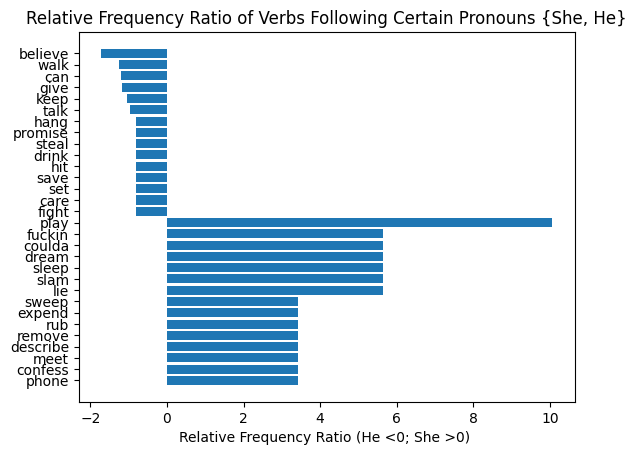

In [60]:
plt.rcdefaults()
fig, ax = plt.subplots()

y_pos = np.arange(len(verbs))
ax.barh(y_pos, freqs, align="center")
ax.set_yticks(y_pos, labels=verbs)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Relative Frequency Ratio (He <0; She >0) ')
ax.set_title('Relative Frequency Ratio of Verbs Following Certain Pronouns {She, He}')

plt.show()